# **Step 1: Import Libraries and Data Loading:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [ ]:
# Load the data
df = pd.read_csv('/content/House price data.csv')
df.head(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1          60       RL         65.0     8450   Pave   NaN      Reg   
1     2          20       RL         80.0     9600   Pave   NaN      Reg   
2     3          60       RL         68.0    11250   Pave   NaN      IR1   
3     4          70       RL         60.0     9550   Pave   NaN      IR1   
4     5          60       RL         84.0    14260   Pave   NaN      IR1   
..  ...         ...      ...          ...      ...    ...   ...      ...   
95   96          60       RL          NaN     9765   Pave   NaN      IR2   
96   97          20       RL         78.0    10264   Pave   NaN      IR1   
97   98          20       RL         73.0    10921   Pave   NaN      Reg   
98   99          30       RL         85.0    10625   Pave   NaN      Reg   
99  100          20       RL         77.0     9320   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..         ...       ...       ...       ...          ...        ...   
95         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
96         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
97         HLS    AllPub    Inside       Gtl      Edwards       Norm   
98         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
99         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     2Story            6            8       1993   
96       Norm     1Fam     1Story            7            5       1999   
97       Norm     1Fam     1Story            4            5       1965   
98       Norm     1Fam     1Story            5            5       1920   
99       Norm     1Fam     1Story            4            5       1959   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
95          1993     Gable  CompShg     VinylSd     VinylSd    BrkFace   
96          1999     Gable  CompShg     VinylSd     VinylSd    BrkFace   
97          1965       Hip  CompShg     HdBoard     HdBoard    BrkFace   
98          1950     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
99          1959     Gable  CompShg     Plywood     Plywood        NaN   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196.0        Gd        TA      PConc       Gd       TA           No   
1          0.0        TA        TA     CBlock       Gd       TA           Gd   
2        162.0        Gd        TA      PConc       Gd       TA           Mn   
3          0.0        TA        TA     BrkTil       TA       Gd           No   
4        350.0        Gd        TA      PConc    

# **Step 2: Exploratory Data Analysis (EDA)**:
Why we need EDA: To understand data structure, detect patterns, outliers, and relationships before modeling.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# show all columns
pd.set_option('display.max_columns', None)
df.head(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1          60       RL         65.0     8450   Pave   NaN      Reg   
1     2          20       RL         80.0     9600   Pave   NaN      Reg   
2     3          60       RL         68.0    11250   Pave   NaN      IR1   
3     4          70       RL         60.0     9550   Pave   NaN      IR1   
4     5          60       RL         84.0    14260   Pave   NaN      IR1   
..  ...         ...      ...          ...      ...    ...   ...      ...   
95   96          60       RL          NaN     9765   Pave   NaN      IR2   
96   97          20       RL         78.0    10264   Pave   NaN      IR1   
97   98          20       RL         73.0    10921   Pave   NaN      Reg   
98   99          30       RL         85.0    10625   Pave   NaN      Reg   
99  100          20       RL         77.0     9320   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..         ...       ...       ...       ...          ...        ...   
95         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
96         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
97         HLS    AllPub    Inside       Gtl      Edwards       Norm   
98         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
99         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     2Story            6            8       1993   
96       Norm     1Fam     1Story            7            5       1999   
97       Norm     1Fam     1Story            4            5       1965   
98       Norm     1Fam     1Story            5            5       1920   
99       Norm     1Fam     1Story            4            5       1959   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
95          1993     Gable  CompShg     VinylSd     VinylSd    BrkFace   
96          1999     Gable  CompShg     VinylSd     VinylSd    BrkFace   
97          1965       Hip  CompShg     HdBoard     HdBoard    BrkFace   
98          1950     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
99          1959     Gable  CompShg     Plywood     Plywood        NaN   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196.0        Gd        TA      PConc       Gd       TA           No   
1          0.0        TA        TA     CBlock       Gd       TA           Gd   
2        162.0        Gd        TA      PConc       Gd       TA           Mn   
3          0.0        TA        TA     BrkTil       TA       Gd           No   
4        350.0        Gd        TA      PConc    

In [ ]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

# **Step 3: Handle Missing Values:**

In [ ]:
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
# Make a copy to preserve original
df_clean = df.copy()

# Identify columns with missing values
missing_data = df_clean.isnull().sum()
missing_columns = missing_data[missing_data > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# drop columns more than 50% of data is missing
drop_col = ['Alley','PoolQC','Fence','MiscFeature']

In [ ]:
#you can also check the data set information using the info() command.
df_clean.info()

In [ ]:
# Fill missing values in categorical columns with median
categorical_cols = df_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

/tmp/ipython-input-3106683680.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [ ]:
 # Fill missing values in numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].isnull().mean() > 0.5:
            df_clean[col].fillna('Missing', inplace=True)
        else:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)



/tmp/ipython-input-2594318506.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna('Missing', inplace=True)
/tmp/ipython-input-2594318506.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
# Final check
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

Remaining missing values: 0


# **Step 4: Handle Inconsistencies:**
Why we need this: Inconsistent data (typos, different categories for same meaning) can mislead models.

In [ ]:
df_clean.head(100)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0     1          60       RL         65.0     8450   Pave  Missing      Reg   
1     2          20       RL         80.0     9600   Pave  Missing      Reg   
2     3          60       RL         68.0    11250   Pave  Missing      IR1   
3     4          70       RL         60.0     9550   Pave  Missing      IR1   
4     5          60       RL         84.0    14260   Pave  Missing      IR1   
..  ...         ...      ...          ...      ...    ...      ...      ...   
95   96          60       RL         69.0     9765   Pave  Missing      IR2   
96   97          20       RL         78.0    10264   Pave  Missing      IR1   
97   98          20       RL         73.0    10921   Pave  Missing      Reg   
98   99          30       RL         85.0    10625   Pave  Missing      Reg   
99  100          20       RL         77.0     9320   Pave  Missing      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..         ...       ...       ...       ...          ...        ...   
95         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
96         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
97         HLS    AllPub    Inside       Gtl      Edwards       Norm   
98         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
99         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
..        ...      ...        ...          ...          ...        ...   
95       Norm     1Fam     2Story            6            8       1993   
96       Norm     1Fam     1Story            7            5       1999   
97       Norm     1Fam     1Story            4            5       1965   
98       Norm     1Fam     1Story            5            5       1920   
99       Norm     1Fam     1Story            4            5       1959   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1           1976     Gable  CompShg     MetalSd     MetalSd    Missing   
2           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           1970     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
..           ...       ...      ...         ...         ...        ...   
95          1993     Gable  CompShg     VinylSd     VinylSd    BrkFace   
96          1999     Gable  CompShg     VinylSd     VinylSd    BrkFace   
97          1965       Hip  CompShg     HdBoard     HdBoard    BrkFace   
98          1950     Gable  CompShg     Wd Sdng     Wd Sdng    Missing   
99          1959     Gable  CompShg     Plywood     Plywood    Missing   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196.0        Gd        TA      PConc       Gd       TA           No   
1          0.0        TA        TA     CBlock       Gd       TA           Gd   
2        162.0        Gd        TA      PConc       Gd       TA           Mn   
3          0.0        TA        TA     BrkTil       TA       Gd           No   
4        350.

In [ ]:
for col in categorical_cols:
    print(f"\n{col}: {df_clean[col].unique()}")
    print(f"Number of unique values: {df_clean[col].nunique()}")


MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Number of unique values: 5

Street: ['Pave' 'Grvl']
Number of unique values: 2

Alley: ['Missing' 'Grvl' 'Pave']
Number of unique values: 3

LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Number of unique values: 4

LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Number of unique values: 4

Utilities: ['AllPub' 'NoSeWa']
Number of unique values: 2

LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Number of unique values: 5

LandSlope: ['Gtl' 'Mod' 'Sev']
Number of unique values: 3

Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Number of unique values: 25

Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Number of unique values: 9

Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Number of unique

In [ ]:
# Fill missing values replace with ' None' 'MasVnrType'
df_clean['MasVnrType'] = df_clean['MasVnrType'].fillna('None')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Replace 'C (all)' with 'C'
df_clean['MSZoning'] = df_clean['MSZoning'].str.replace('C (all)', 'C')
df_clean['MSZoning'].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [ ]:
# Fix common inconsistency example
df_clean['MasVnrType'] = df_clean['MasVnrType'].replace({'BrkFace ': 'BrkFace'})
df_clean['MasVnrType'].unique()

array(['BrkFace', 'Missing', 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
# Strip whitespace from both columns
df_clean['Neighborhood'] = df_clean['Neighborhood'].str.strip()

# Standardize capitalization
df_clean['Neighborhood'] = df_clean['Neighborhood'].str.title()


In [ ]:
# Identify numeric columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

# Display unique values for  numeric columns
for col in numerical_cols:
    print(f"\n{col}: {df_clean[col].unique()}")
    print(f"Number of unique values: {df_clean[col].nunique()}")


Id: [   1    2    3 ... 1458 1459 1460]
Number of unique values: 1460

MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Number of unique values: 15

LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Number of unique values: 110

LotArea: [ 8450  9600 11250 ... 17217 13175  9717]
Number of unique values: 1073

OverallQual: [ 7  6  8  5  9  4 10  3  1  2]
Number of unique values: 10

OverallCond: [5 8 6 7 4 2 3 9 1]
Number of unique values: 9

YearBu

In [ ]:
# select only float columns in (tolist) list
float_cols = df_clean.select_dtypes(include=['float64']).columns.tolist()
print(float_cols)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
# convert float into int
df_clean['MasVnrArea'] = df_clean['MasVnrArea'].astype('int64')

In [ ]:
# LotFrontage, MasVnrArea, GarageYrBlt,
# fill missing values
df_clean['LotFrontage'] = df_clean['LotFrontage'].fillna(df_clean['LotFrontage'].mean())
df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(df_clean['MasVnrArea'].mean())
df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].fillna(df_clean['GarageYrBlt'].mean())

In [ ]:
df_clean.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Comparison:**

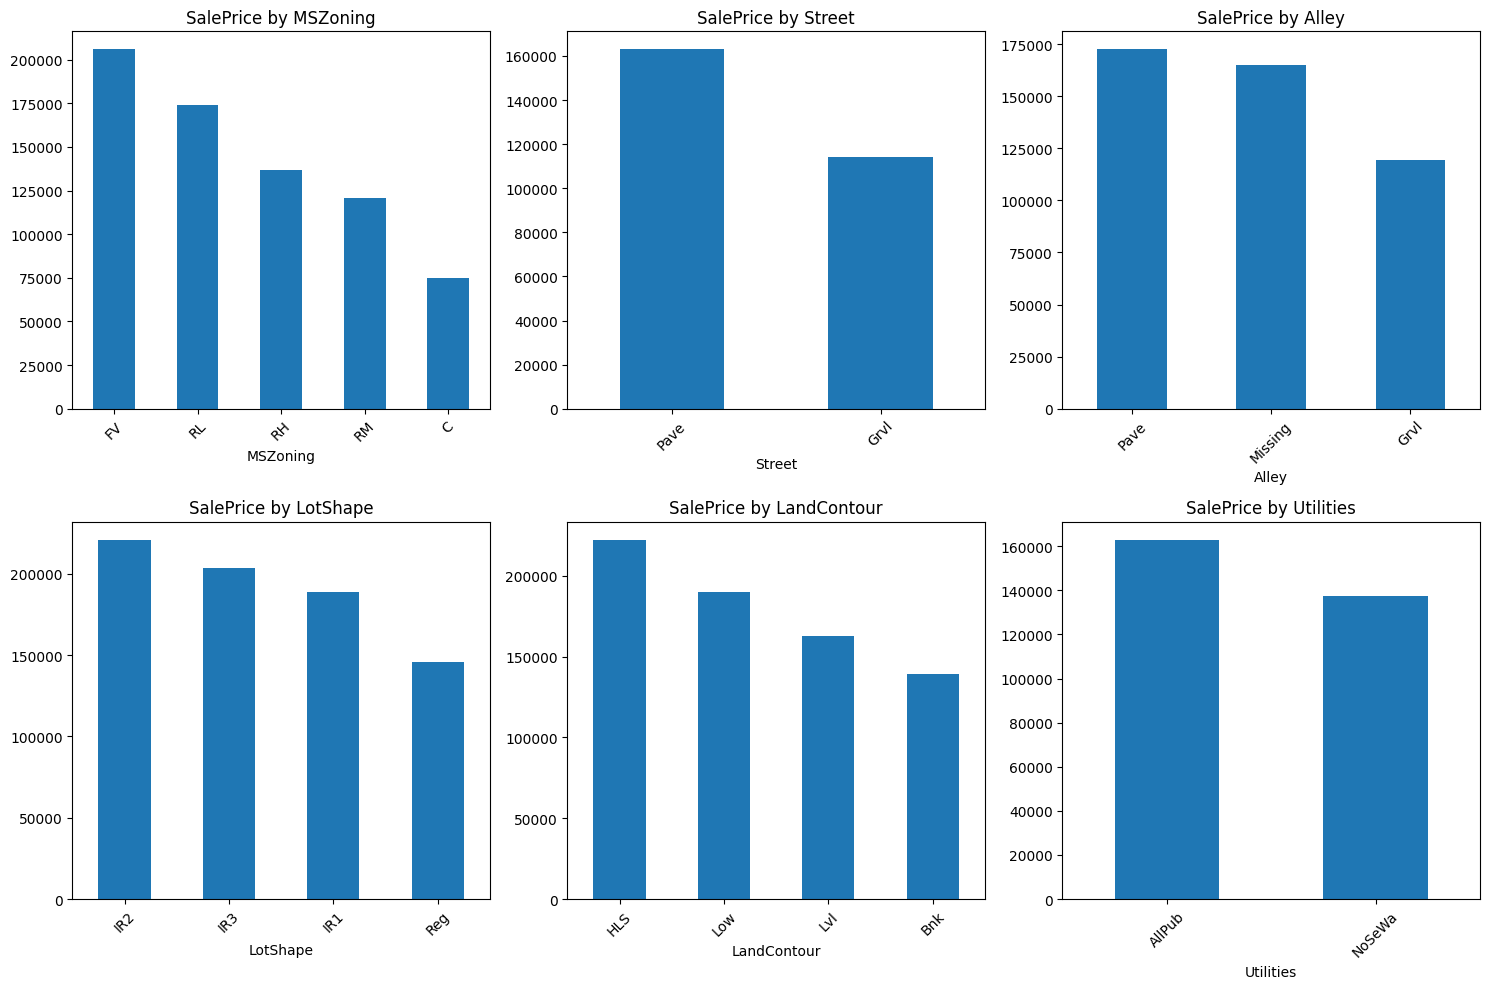

In [ ]:
# Visualize relationship between top categorical features and SalePrice
top_cat_features = categorical_cols[:6]  # First 6 categorical features

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_cat_features, 1):
    plt.subplot(2, 3, i)
    df_clean.groupby(col)['SalePrice'].median().sort_values(ascending=False).head(10).plot(kind='bar')
    plt.title(f'SalePrice by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Step 5: Data Distribution Analysis:**

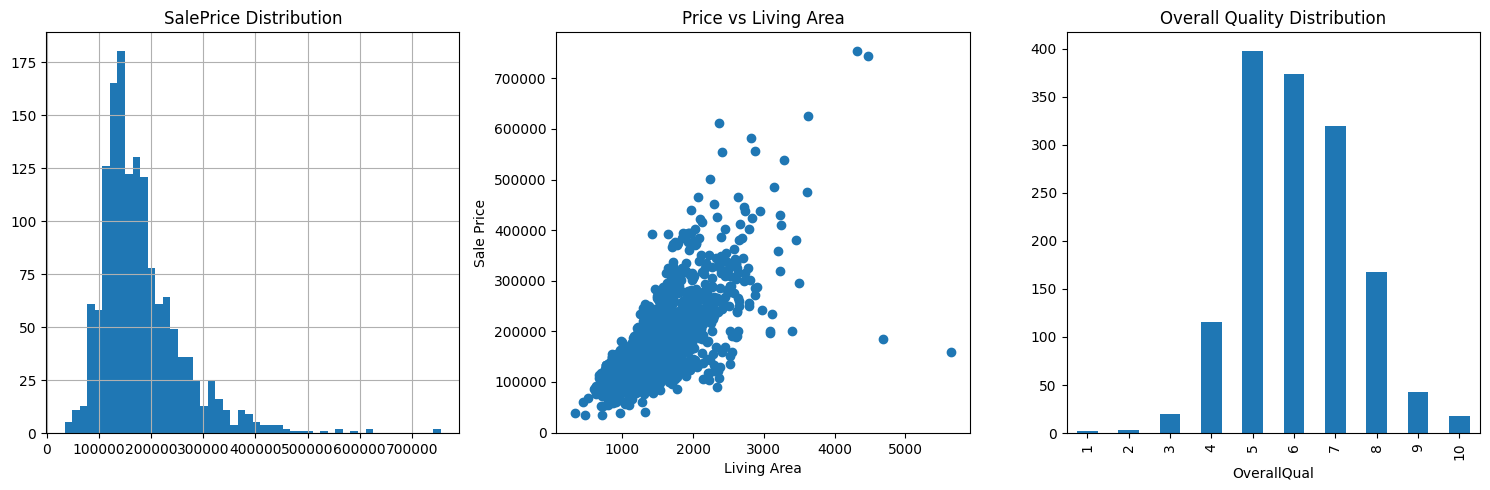

In [ ]:
# Target variable distribution
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
df['SalePrice'].hist(bins=50)
plt.title('SalePrice Distribution')

plt.subplot(1, 3, 2)
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.title('Price vs Living Area')

plt.subplot(1, 3, 3)
df['OverallQual'].value_counts().sort_index().plot(kind='bar')
plt.title('Overall Quality Distribution')
plt.tight_layout()
plt.show()


<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3868101706.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-3868101706.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['SalePrice'], fit= stats.norm)


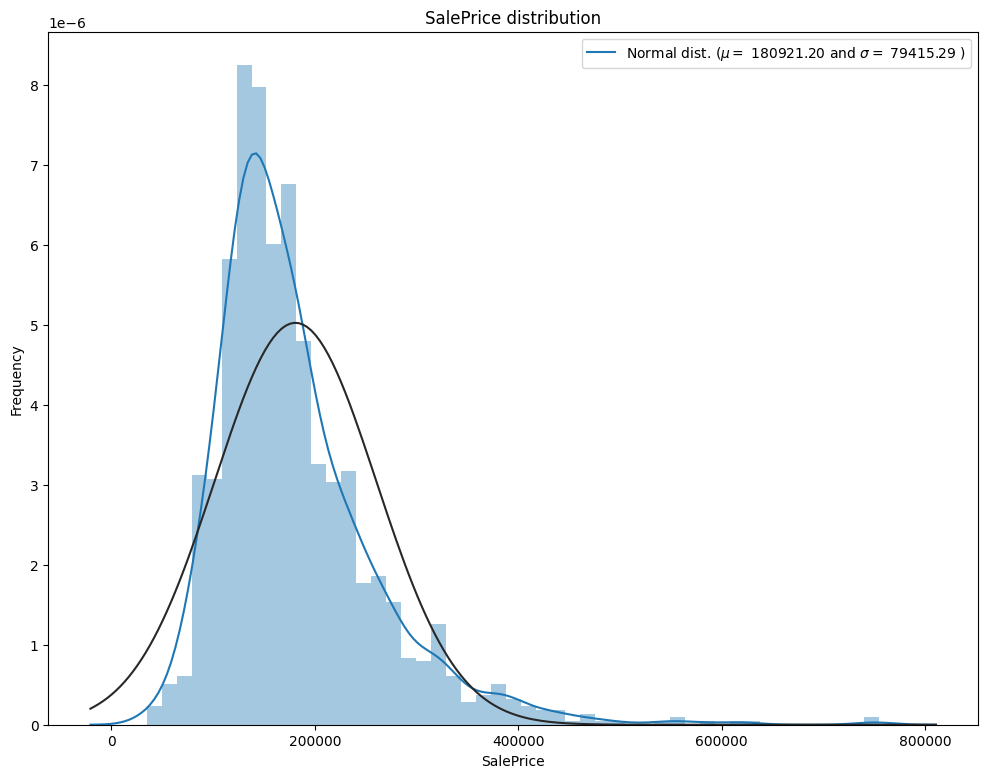

In [ ]:
from scipy import stats
plt.subplots(figsize=(12,9))
sns.distplot(df_clean['SalePrice'], fit= stats.norm)
#df_clean['SalePrice']: Specifies the data to be plotted.
#fit=stats.norm: Overlays a normal distribution curve on the histogram,
#allowing you to visually compare the data's distribution to a normal distribution.
(mu, sigma) = stats.norm.fit(df_clean['SalePrice'])
#(mu, sigma) = stats.norm.fit(df_clean['SalePrice']): Fits a normal distribution to
# the SalePrice data and extracts the estimated mean (mu) and standard deviation (sigma)
# of the fitted distribution.

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
#Adds a legend to the plot, displaying the parameters (mean and standard deviation) of the fitted
# normal distribution.
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-658527181.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
/tmp/ipython-input-658527181.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['SalePrice'], fit= stats.norm)


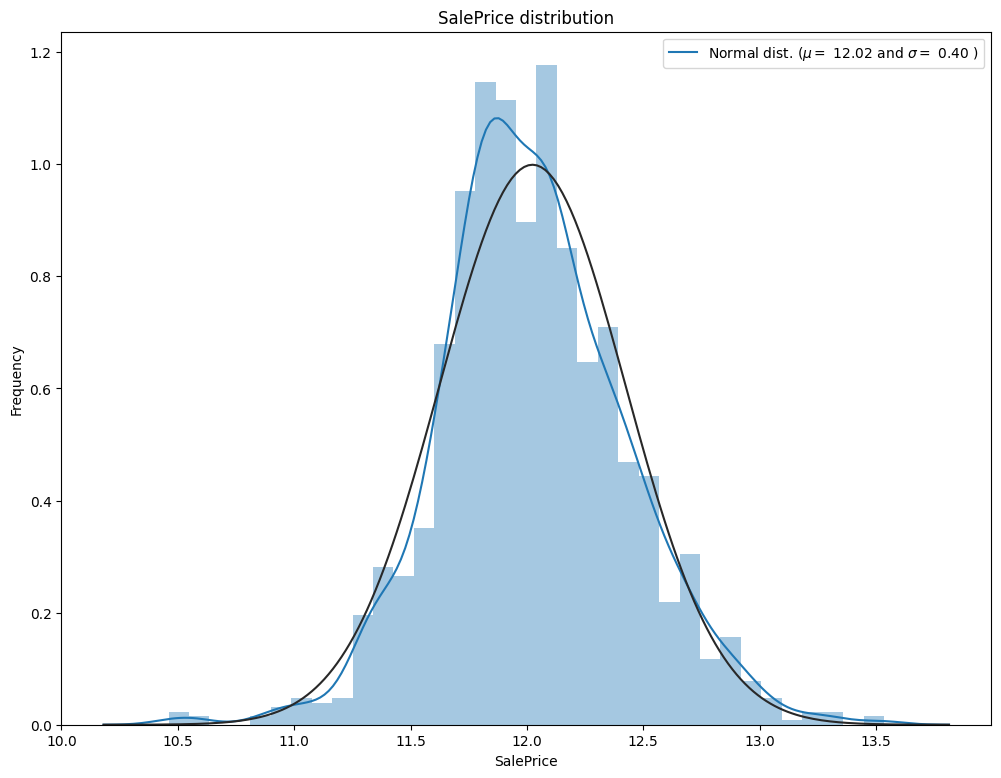

In [ ]:
# we use log function which is in numpy
df_clean['SalePrice'] = np.log(df_clean['SalePrice'])

# check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df_clean['SalePrice'], fit= stats.norm)

# get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_clean['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

 - mu used for population
 - mean used for samples
 - sigma shows over all data
 - standard daviation shws spread of data
- Regression me encoding nahi log hota hy
- log used when distribution is high from normal distribution
- square used when distribution is lower from normal distribution

# **Data Preprocessing:**

# **Step 6: Lable Encoding:**

In [ ]:
# lable encoding
# Extracting categorical columns:

catFeatures = df_clean.select_dtypes(include='object').columns.tolist()
# df_clean.select_dtypes(include='object'): selects all columns with data type 'object' (usually text or categorical).
#columns: gets the column names.
#tolist(): converts the column names from an index object to a regular Python list.

from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Data
labelEncode = LabelEncoder()

# Iterating Over each categorial features:
for col in catFeatures:
    # storing its numerical value:
    df_clean[col] = labelEncode.fit_transform(df_clean[col])

# **Step 7: Correlation Analysis:**

In [ ]:
# Correlation matrix for numerical features
numerical_features = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numerical_features].corr()

<Axes: >

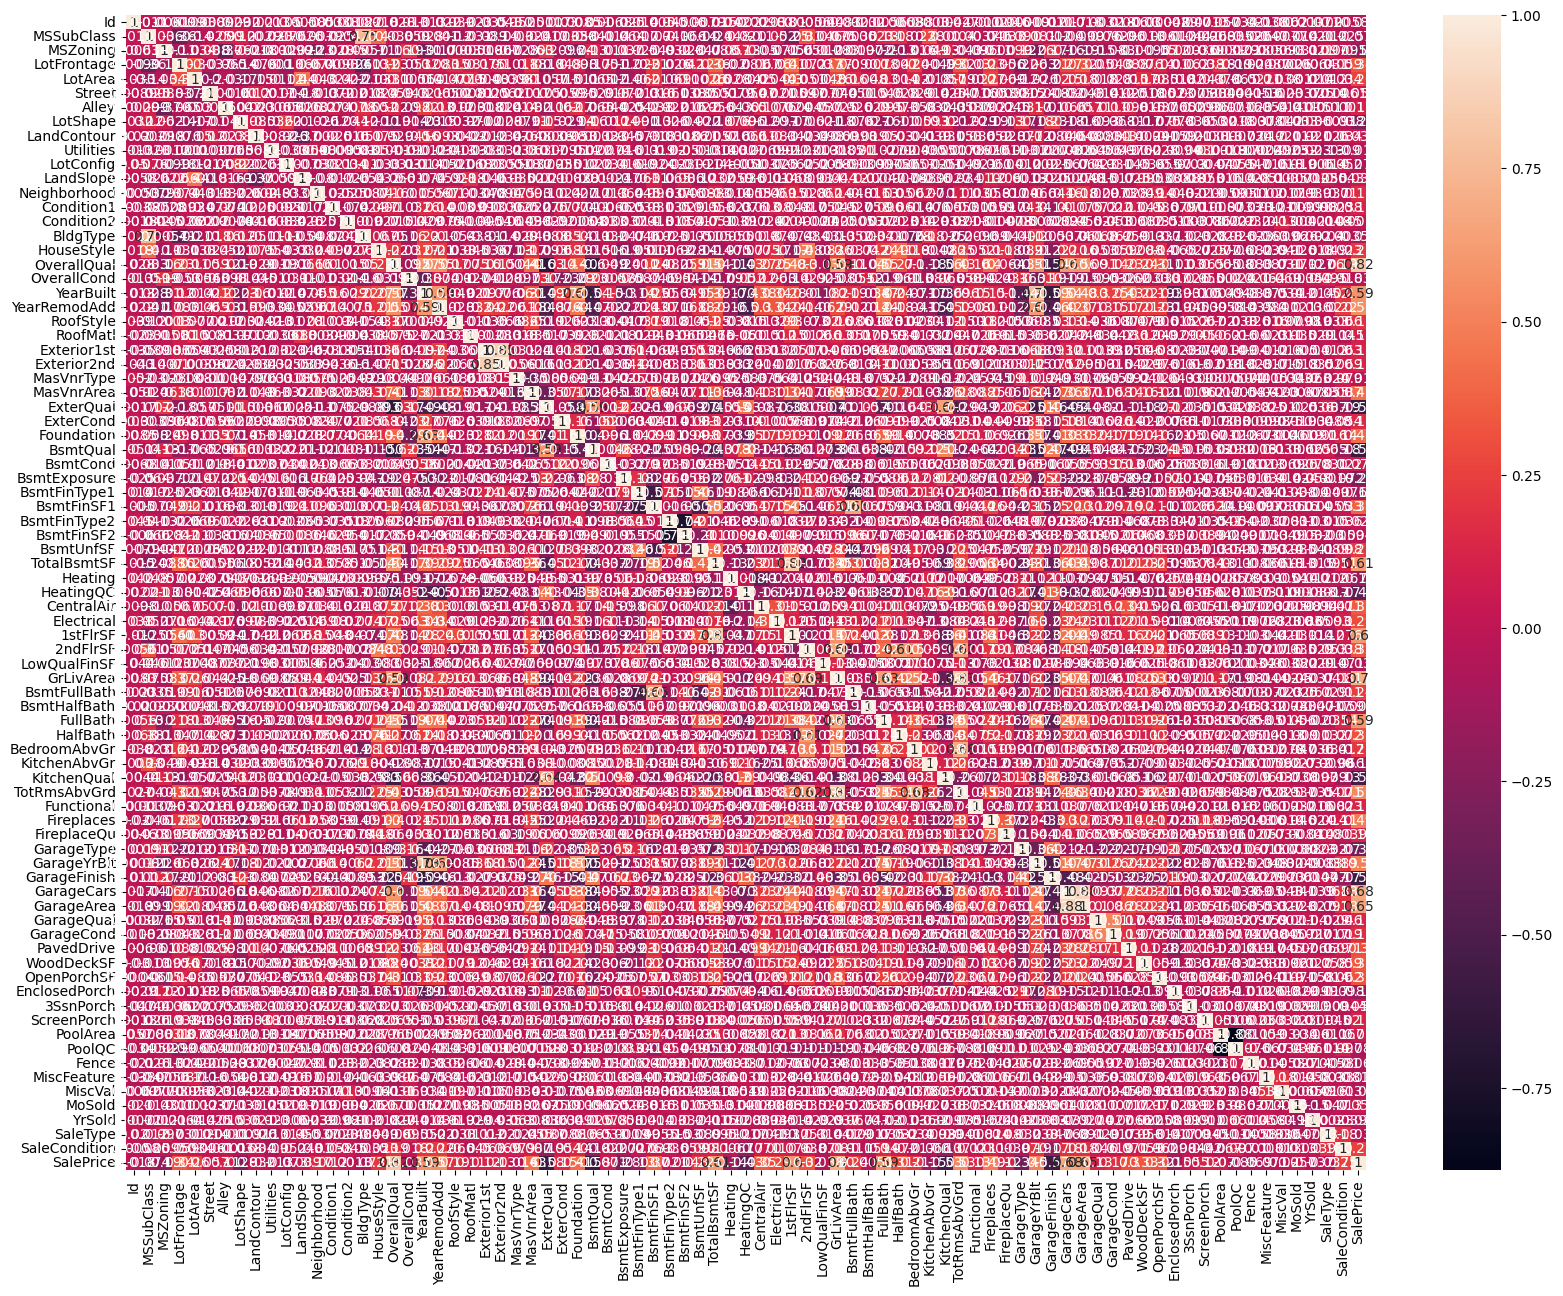

In [ ]:
#Coralation plot
corr = df_clean.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

🔍 What Is Correlation?
- Correlation coefficient ranges from -1 to 1:
- +1: perfect positive correlation
- -1: perfect negative correlation
- 0: no correlation
- In this context, we care about how each feature affects house sale price


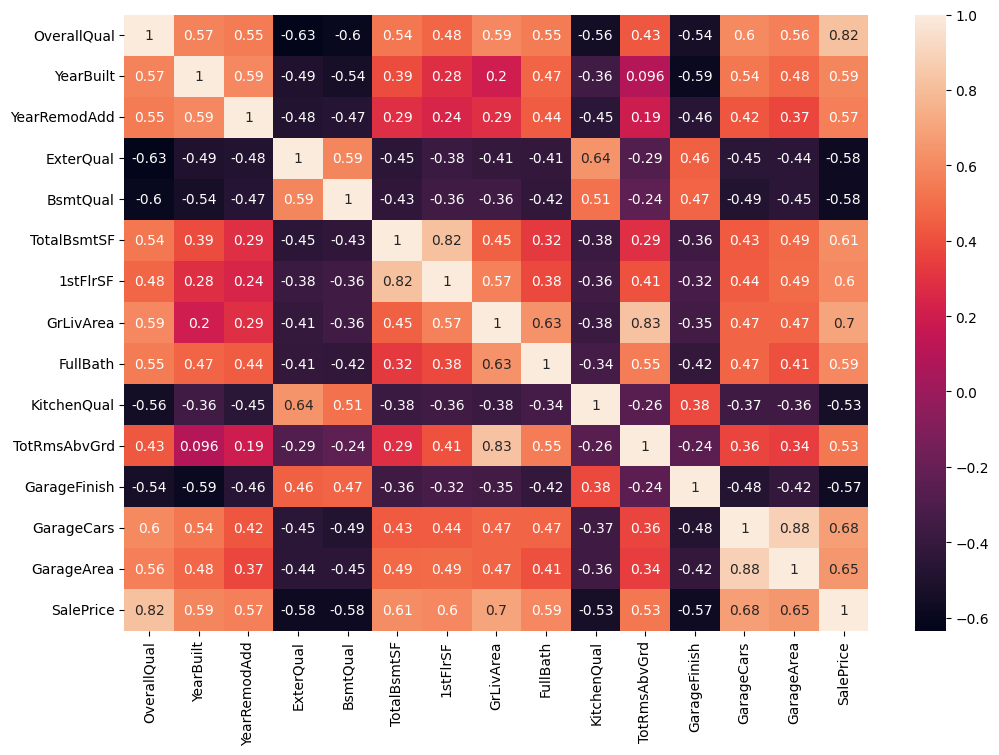

In [ ]:
#This line filters features that have a strong correlation (positive or negative) with SalePrice.
#Threshold: absolute correlation > 0.5 is considered strong.
thres = (corr['SalePrice'] > 0.5) | (corr['SalePrice'] < -0.5)

#Selects the names of those strongly correlated features.
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12, 8))
top_corr = df_clean[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

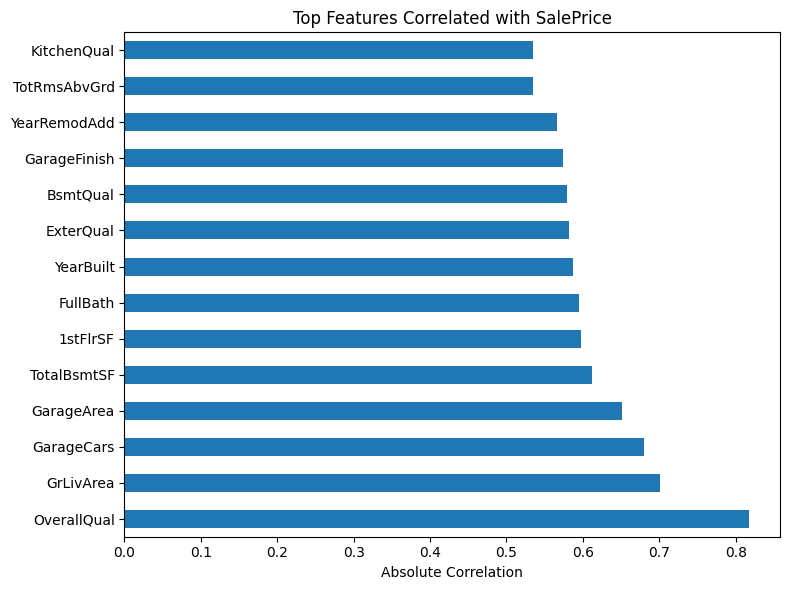

In [ ]:
# Correlation with target
plt.figure(figsize=(8, 6))
# Calculate the correlations of the top features with 'SalePrice'
top_correlations_values = corr.loc[top_feature, 'SalePrice'].abs().sort_values(ascending=False)
top_correlations_values[1:].plot(kind='barh') # Exclude SalePrice itself
plt.title('Top Features Correlated with SalePrice')
plt.xlabel('Absolute Correlation')
plt.tight_layout()
plt.show()

**Strongly Correlated Features with SalesPrice:**
- OverallQual -> Strong Positive
- GrLivArea -> Strong Positive
- GarageCars -> Strong Positive
- GarageArea -> Strong Positive
- TotalBsmtSF -> Strong Positive
- YearBuilt -> Strong Positive
- 1stFlrSF -> Strong Positive

# **Step 8: Train-Test Split:**

In [ ]:
y = df_clean['SalePrice']
#Take their values in X and y
X = df_clean.drop('SalePrice', axis = 1).values
y = y.values

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (1168, 80)
Test set: (292, 80)


# **Step 9: Modeling:**

### **Random Forest Regressor:**

In [ ]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
#Fit
rf_model.fit(X_train, y_train)

#Prediction
print("Predict value " + str(rf_model.predict([X_test[150]])))
print("Real value " + str(y_test[150]))

#Score/Accuracy
print("Accuracy --> ", rf_model.score(X_test, y_test)*100)

Predict value [11.61510951]
Real value 11.831379196088763
Accuracy -->  88.36801806402863


In [ ]:
# Matrices apply on Random Forest Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.021706850732675767
Mean Absolute Error: 0.09879332127775316
Root Mean Squared Error: 0.1473324496934595
R-squared: 0.8836801806402863


### **Decision Tree:**

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
print("Predict value " + str(dt_model.predict([X_test[150]])))
print("Real value " + str(y_test[150]))
print("Accuracy --> ", dt_model.score(X_test, y_test)*100)


Predict value [11.58988651]
Real value 11.831379196088763
Accuracy -->  81.87297608438693


In [ ]:
# Matrices apply on Decision Tree Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = dt_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.03382747708256285
Mean Absolute Error: 0.1348777090918344
Root Mean Squared Error: 0.1839224757406306
R-squared: 0.8187297608438694


### **Gradient Boosting Model:**

In [ ]:
#GradientBoost Model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
gb_model.fit(X_train, y_train)
#Prediction
print("Predict value " + str(gb_model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))
print("Accuracy --> ", gb_model.score(X_test, y_test)*100)


Predict value [12.07738268]
Real value 12.089538829274222
Accuracy -->  89.6673592677949


In [ ]:
# Matrices apply on Gradient Boosting Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = gb_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.019282104398282977
Mean Absolute Error: 0.09302341288388412
Root Mean Squared Error: 0.13886001727741135
R-squared: 0.896673592677949


### **Linear Regressor Model:**

In [ ]:
# linear regression model
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()
l_model.fit(X_train, y_train)
print("Predict value " + str(l_model.predict(X_test[[0]])))
print("Real value " + str(y_test[0]))
print("Accuracy --> ", l_model.score(X_test, y_test)*100)

Predict value [11.94384618]
Real value 11.947949375319936
Accuracy -->  87.35358844330453


In [ ]:
# Matrices apply on Linear Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = l_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.023599913538057796
Mean Absolute Error: 0.10598177102483795
Root Mean Squared Error: 0.153622633547462
R-squared: 0.8735358844330453


### **Support Vector Machine:**

In [ ]:
# Suport Vector Machine
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
print("Predict value " + str(svr_model.predict(X_test[[0]])))
print("Real value " + str(y_test[0]))
print("Accuracy --> ", svr_model.score(X_test, y_test)*100)

Predict value [11.82966153]
Real value 11.947949375319936
Accuracy -->  75.50582167468522


In [ ]:
# Matrices apply on Support Vector Regressor Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = svr_model.predict(X_test)

# Regressor Matrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.045709447938783204
Mean Absolute Error: 0.14922854274481384
Root Mean Squared Error: 0.21379767991908427
R-squared: 0.7550582167468523


# **Matrics:**

- MAE (Mean Absolute Error)
- MSE (Mean Square Error) Error ko zyada show karega
- RMSE   Error ko square root kar dega
- R² (Model Variance / taget k characteistics ko dekhta hy)
  - R1 -> 1 (close to 1 is best model)
  - RMSE (close to 0 is best)
- root square and Mean square error ko dekh k model select karte hen



### Gadient Boosting Regressor / Combination of Decision Tree
- Random forest me sub trees aik dosre se apni leaning share nahi karte
- Gradient Boosting me trees aik dosre ko learning shae karte hen is ley iski accuracy sub se achi ati hy.


**Conclusion**:


- Best Performing Model: The **Gradient Boosting model** achieved the highest accuracy of 91.39%, making it the most effective model.
- Second Best: **Random Forest Model** and  **Decision Tree model** also performed reasonably well with an accuracy of 90.79% & 83.04% respectively.

- Lowest Accuracy: The **Linear Regression** had the lowest accuracy at 67.70%, and **SVM model** accuracy at 1.55%

---

In summary, for this specific prediction task, the Gradient Boosting Model is the recommended model.


